In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import sympy as sp 
from sympy import *
import random
from scipy.linalg import expm
from sympy.physics.quantum import TensorProduct
import numpy as np 
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
sp.init_printing()

In [2]:
#nomenculture like E01 ground energy of qubit 1 
E11,E01,P1, E_11, E_01, J11 = sp.symbols("E_{11} E_{01} P_{1} E_{11c} E_{01c} J_{11}")
I2 = sp.eye(2)
a_dag = sp.Matrix([[0,0],
                   [1,0]])
sigmap = sp.Matrix([[0,0],[1,0]])
sigmam=sigmap.T
#state of our reservior system 
qr1 = sp.Matrix([[E01,P1.conjugate()],
                 [P1,E11]])
#hamil of res, if more tensor of all
qrh = qr1
c1 = sp.Matrix([[E_01,0],[0,E_11]])
#hamilt of comp sys
ch = c1
#hamil of total system is thus
Hh = TensorProduct(ch,I2) + TensorProduct(I2,qrh)
#can edit values here if need be
E01,E_11c, E_01c = (0,0,0)

ch = ch.subs({"E_{11c}":E_11c, "E_{01c}":E_01c})
qrh = qrh.subs({"E_{11}":E11,"E_{01}":E01,"P_{1}":P1})
#just rewritting hamil with zero potential+gnd state
H = TensorProduct(ch,I2) + TensorProduct(I2,qrh)
#now to introduce coupling 
def MTP(A,B):
    return TensorProduct(A,B)
H = H + J11.conjugate()*(MTP(sigmap,a_dag.T)) + J11 * (MTP(sigmam, a_dag))


In [3]:
#basis vector representation & defining initial computational and reservoir qubits
#assuming QN in vacuum state

gnd_state = np.array([[1],[0]]) #the |0> state

phi_initial_g = np.array([[1],[0]]) #the |0> state for computational qubit
vac = np.array([[1],[0]]) #the |0> state for reservoir qubit
phi_initial_e = np.array([[0],[1]]) #the |1> state for computational qubit

exc_state = np.array([[0],[1]]) #the |1> state

In [5]:
H

⎡       _____                 ⎤
⎢  0    P_{1}     0       0   ⎥
⎢                             ⎥
⎢P_{1}  E_{11}  J_{11}    0   ⎥
⎢                             ⎥
⎢       ______          _____ ⎥
⎢  0    J_{11}    0     P_{1} ⎥
⎢                             ⎥
⎣  0      0     P_{1}   E_{11}⎦

# CASE 1: KEEPING z1,z2 CONSTANT AND CHANGING P,J VALUES

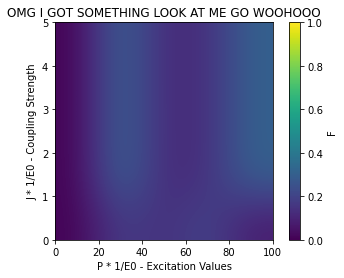


P =  [  0.  25.  50.  75. 100.] 
J = [0.   1.25 2.5  3.75 5.  ] 
E =  3 
(z1,z2) =
((-0.29114518893406527+0.9854204297212057j),(0.6951042709223331+0.32465118388232306j))


In [18]:
########################### DEFINING H AND U OPERATOR ################################

Hcopy = H
E0 = 1
div = 5
P_array = np.linspace(0,100,div) / E0
J_array = np.linspace(0,5,div) / E0
E = 3#3*np.pi/2

hbar = 1
t = 3*E0/hbar

Ham={}
k=0
for i in range(len(P_array)):
    for j in range(len(J_array)):
        Ham[k] = np.array(Hcopy.subs({"E_{11}":E,"P_{1}":P_array[i],
                    "J_{11}":J_array[j]})).astype('complex128') * 1/E0
        k+=1
# for each P value; J value iterated through and stored
# so Ham[0] is when is P[0] and J[0] but Ham[3] is when
# P[0] and J[3]

U = {}
for i in range(len(Ham)):
    U[i] = expm(-1j* Ham[i] * t)
# U[0] is when Ham[0] and that is when P[0] and J[0]
# U[5] is Ham[5] which is P[1] and J[0]

################################ INITIAL STATE ######################################

# z = x+iy
# x and y bewteen -1 and 1 exclusive
x1 = np.random.rand(1)*np.power(-1,np.random.randint(1,3))
y1 = np.random.rand(1)*np.power(-1,np.random.randint(1,3))
z1 = complex(x1,y1)
i = 1
test0 = 0*j
while i > 0:
    x2 = np.random.rand(1)*np.power(-1,np.random.randint(1,3))
    y2 = np.random.rand(1)*np.power(-1,np.random.randint(1,3))
    z2 = complex(x2,y2)
    if z2 == test0:
        if z2==z1:
            continue
    else: 
        break

phi_initial = z1*phi_initial_g + z2*phi_initial_e

######### sample 2000 sets of phi's ####################

#
# n = 2000
# phi_initial={}
# for i in range(n):
#     x1 = np.random.rand(1)*np.power(-1,np.random.randint(1,3))
#     y1 = np.random.rand(1)*np.power(-1,np.random.randint(1,3))
#     z1 = complex(x1,y1)
#     k = 1
#     test0 = 0*j
#     while k > 0:
#         x2 = np.random.rand(1)*np.power(-1,np.random.randint(1,3))
#         y2 = np.random.rand(1)*np.power(-1,np.random.randint(1,3))
#         z2 = complex(x2,y2)
#         if z2 == test0:
#             if z2==z1:
#                 continue
#         else: 
#             break

#     phi_initial[i] = z1*phi_initial_g + z2*phi_initial_e
# psi_initial = {}
# for i in range(n):
#     psi_initial[i] = 1/np.sqrt(np.abs(z1)**2+np.abs(z2)**2) * (
#                 MTP(phi_initial[i],vac) )

#################################################

#the |phi_initial> (x)  |vac>_QN state = 1/N |psi_initial>
psi_initial = 1/np.sqrt(np.abs(z1)**2+np.abs(z2)**2) *(
                MTP(phi_initial, vac) )

################################ FINAL STATE ######################################

# |psi_out> = U|psi_initial>
psi_out = {}
for i in range(len(U)):
    psi_out[i] = U[i]@psi_initial 

################################ PHO MATRIX ######################################

# pho = |psi><psi|
pho = {} 
for i in range(len(psi_out)):
    pho[i] = MTP(psi_out[i],psi_out[i].conjugate().T)

############################# REDUCED PHO MATRIX ######################################

pho_c = {}
Id = np.eye(2) 
for i in range(len(pho)):
    pho_c[i] = MTP(Id, gnd_state.T)@pho[i]@MTP(Id, gnd_state) + ( 
    MTP(Id, exc_state.T)@pho[i]@MTP(Id, exc_state) )
    
################################ IDEAL STATES ######################################

X_gate = np.array([[0,1],[1,0]])
phi_ideal = X_gate @ phi_initial

################################# FIDELITY ######################################
F = np.zeros(len(pho_c))
F_norm = np.zeros(len(pho_c))
Ftemp={}
k=0
for i in range(len(pho_c)):
    Ftemp[i] = (phi_ideal.conjugate().T @ pho_c[i] @ phi_ideal).real
    F[i] = Ftemp[i][0][0]
norm = np.linalg.norm(F)
F_norm = F/norm

F_array = np.zeros((len(P_array),len(J_array)))
k=0
for i in range(len(P_array)):
    for j in range(len(J_array)):
        F_array[i][j] = F_norm[k]
        k+=1
def forceAspect(ax,aspect=1):
    im = ax.get_images()
    extent =  im[0].get_extent()
    ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)
fig, ax = plt.subplots()
X,Y = np.meshgrid(P_array,J_array)
#ax.set_aspect('auto')
#norm_F_array = (F_array - np.min(F_array)) / (np.max(F_array) - np.min(F_array))
pos=ax.imshow(F_array, cmap='viridis', interpolation='bicubic', extent=[P_array[0],P_array[-1],J_array[-1],J_array[0]], vmin=0,vmax=1)
ax.invert_yaxis()
forceAspect(ax,aspect=1)
ax.set_title('OMG I GOT SOMETHING LOOK AT ME GO WOOHOOO')
ax.set_xlabel('P * 1/E0 - Excitation Values')
ax.set_ylabel("J * 1/E0 - Coupling Strength")
cbar = plt.colorbar(pos)
cbar.set_label(r'F')
plt.show()
print('\nP = ', P_array, '\nJ =',J_array,'\nE = ',E, f'\n(z1,z2) =\n({z1},{z2})')

In [19]:
def f(pmin=0,pmax=100,jmin=0,jmax=5,div=5,E0=1,E=3):
    ##################################################################
    #nomenculture like E01 ground energy of qubit 1 
    E11,E01,P1, E_11, E_01, J11 = sp.symbols("E_{11} E_{01} P_{1} E_{11c} E_{01c} J_{11}")
    I2 = sp.eye(2)
    a_dag = sp.Matrix([[0,0],
                       [1,0]])
    sigmap = sp.Matrix([[0,0],[1,0]])
    sigmam=sigmap.T
    #state of our reservior system 
    qr1 = sp.Matrix([[E01,P1.conjugate()],
                     [P1,E11]])
    #hamil of res, if more tensor of all
    qrh = qr1
    c1 = sp.Matrix([[E_01,0],[0,E_11]])
    #hamilt of comp sys
    ch = c1
    #hamil of total system is thus
    Hh = TensorProduct(ch,I2) + TensorProduct(I2,qrh)
    #can edit values here if need be
    E01,E_11c, E_01c = (0,0,0)

    ch = ch.subs({"E_{11c}":E_11c, "E_{01c}":E_01c})
    qrh = qrh.subs({"E_{11}":E11,"E_{01}":E01,"P_{1}":P1})
    #just rewritting hamil with zero potential+gnd state
    H = TensorProduct(ch,I2) + TensorProduct(I2,qrh)
    #now to introduce coupling 
    def MTP(A,B):
        return TensorProduct(A,B)
    H = H + J11.conjugate()*(MTP(sigmap,a_dag.T)) + J11 * (MTP(sigmam, a_dag))

    #basis vector representation & defining initial computational and reservoir qubits
    #assuming QN in vacuum state

    gnd_state = np.array([[1],[0]]) #the |0> state

    phi_initial_g = np.array([[1],[0]]) #the |0> state for computational qubit
    vac = np.array([[1],[0]]) #the |0> state for reservoir qubit
    phi_initial_e = np.array([[0],[1]]) #the |1> state for computational qubit

    exc_state = np.array([[0],[1]]) #the |1> state
    ##################################################################
    
    Hcopy = H
    #E0 = 1
    #div = 5
    P_array = np.linspace(pmin,pmax,div) / E0
    J_array = np.linspace(jmin,jmax,div) / E0
    #E = 3#3*np.pi/2

    hbar = 1
    t = 3*E0/hbar

    Ham={}
    k=0
    for i in range(len(P_array)):
        for j in range(len(J_array)):
            Ham[k] = np.array(Hcopy.subs({"E_{11}":E,"P_{1}":P_array[i],
                        "J_{11}":J_array[j]})).astype('complex128') * 1/E0
            k+=1
    # for each P value; J value iterated through and stored
    # so Ham[0] is when is P[0] and J[0] but Ham[3] is when
    # P[0] and J[3]

    U = {}
    for i in range(len(Ham)):
        U[i] = expm(-1j* Ham[i] * t)
    # U[0] is when Ham[0] and that is when P[0] and J[0]
    # U[5] is Ham[5] which is P[1] and J[0]

    # z = x+iy
    # x and y bewteen -1 and 1 exclusive
    x1 = np.random.rand(1)*np.power(-1,np.random.randint(1,3))
    y1 = np.random.rand(1)*np.power(-1,np.random.randint(1,3))
    z1 = complex(x1,y1)
    i = 1
    test0 = 0*j
    while i > 0:
        x2 = np.random.rand(1)*np.power(-1,np.random.randint(1,3))
        y2 = np.random.rand(1)*np.power(-1,np.random.randint(1,3))
        z2 = complex(x2,y2)
        if z2 == test0:
            if z2==z1:
                continue
        else: 
            break
            
      #constant z1, z2 values instead of changing with different
#     #iteration of function, perhaps f(..,a), a = (x,y,x1,y1)
#     x1=0.25
#     y1=0.75
#     x2=0.24
#     y2=0.42
#     z1=complex(x1,y1)
#     z2=complex(x2,y2)

    phi_initial = z1*phi_initial_g + z2*phi_initial_e


    #the |phi_initial> (x)  |vac>_QN state = 1/N |psi_initial>
    psi_initial = 1/np.sqrt(np.abs(z1)**2+np.abs(z2)**2) *(
                    MTP(phi_initial, vac) )


    # |psi_out> = U|psi_initial>
    psi_out = {}
    for i in range(len(U)):
        psi_out[i] = U[i]@psi_initial 


    # pho = |psi><psi|
    pho = {} 
    for i in range(len(psi_out)):
        pho[i] = MTP(psi_out[i],psi_out[i].conjugate().T)


    pho_c = {}
    Id = np.eye(2) 
    for i in range(len(pho)):
        pho_c[i] = MTP(Id, gnd_state.T)@pho[i]@MTP(Id, gnd_state) + ( 
        MTP(Id, exc_state.T)@pho[i]@MTP(Id, exc_state) )


    X_gate = np.array([[0,1],[1,0]])
    phi_ideal = X_gate @ phi_initial

    F = np.zeros(len(pho_c))
    F_norm = np.zeros(len(pho_c))
    Ftemp={}
    k=0
    for i in range(len(pho_c)):
        Ftemp[i] = (phi_ideal.conjugate().T @ pho_c[i] @ phi_ideal).real
        F[i] = Ftemp[i][0][0]
    norm = np.linalg.norm(F)
    F_norm = F/norm

    F_array = np.zeros((len(P_array),len(J_array)))
    k=0
    for i in range(len(P_array)):
        for j in range(len(J_array)):
            F_array[i][j] = F_norm[k]
            k+=1
    def forceAspect(ax,aspect=1):
        im = ax.get_images()
        extent =  im[0].get_extent()
        ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)
    fig, ax = plt.subplots()
    X,Y = np.meshgrid(P_array,J_array)
    #ax.set_aspect('auto')
    #norm_F_array = (F_array - np.min(F_array)) / (np.max(F_array) - np.min(F_array))
    pos=ax.imshow(F_array, cmap='viridis', interpolation='bicubic', extent=[P_array[0],P_array[-1],J_array[-1],J_array[0]], vmin=0,vmax=1)
    ax.invert_yaxis()
    forceAspect(ax,aspect=1)
    ax.set_title('OMG I GOT SOMETHING LOOK AT ME GO WOOHOOO')
    ax.set_xlabel('P * 1/E0 - Excitation Values')
    ax.set_ylabel("J * 1/E0 - Coupling Strength")
    cbar = plt.colorbar(pos)
    cbar.set_label(r'F')
    plt.show()
    print('\nP = ', P_array, '\nJ =',J_array,'\nE = ',E, f'\n(z1,z2) =\n({z1},{z2})')
    return None #fig

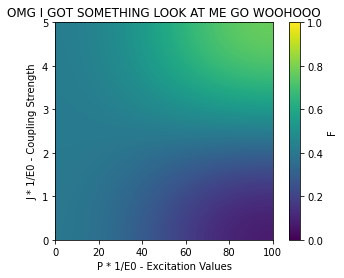


P =  [  0. 100.] 
J = [0. 5.] 
E =  3 
(z1,z2) =
((-0.23382076021965836+0.45917102518580266j),(0.17079880425677607+0.859945559791794j))


In [36]:
# f(pmin=0,pmax=100,jmin=0,jmax=5,div=5,E0=1,E=3):
f(div=2)

In [347]:
from matplotlib.animation import PillowWriter

In [360]:
E_array = np.array([10,20,30,40,50,60])

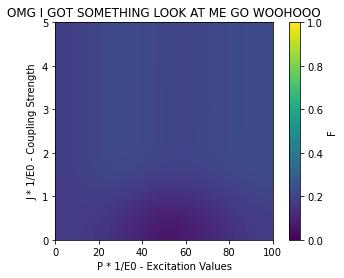


P =  [  0.  25.  50.  75. 100.] 
J = [0.   1.25 2.5  3.75 5.  ] 
E =  10 
(z1,z2) =
((0.30606273844663345+0.2932317059753059j),(0.22270306733627498+0.5466358337590985j))


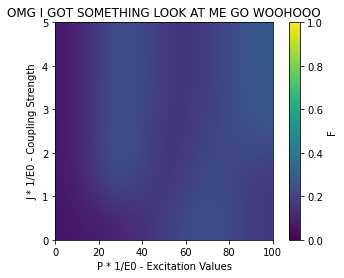


P =  [  0.  25.  50.  75. 100.] 
J = [0.   1.25 2.5  3.75 5.  ] 
E =  20 
(z1,z2) =
((0.07183027875141867-0.3308062858679539j),(-0.39080906388308134-0.3370213842107719j))


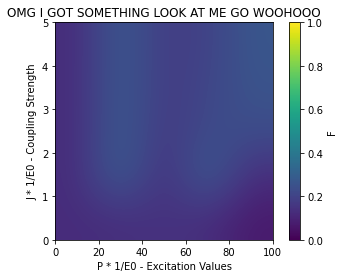


P =  [  0.  25.  50.  75. 100.] 
J = [0.   1.25 2.5  3.75 5.  ] 
E =  30 
(z1,z2) =
((0.7323887256197336+0.2967899728332877j),(0.3260431036428294-0.00435153672514732j))


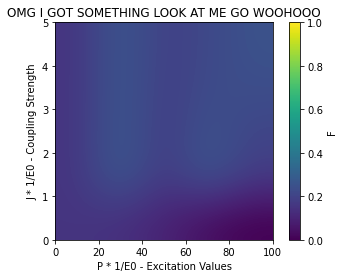


P =  [  0.  25.  50.  75. 100.] 
J = [0.   1.25 2.5  3.75 5.  ] 
E =  40 
(z1,z2) =
((-0.9503517728828207-0.9165801719933764j),(0.14217773341518192+0.8469755870161724j))


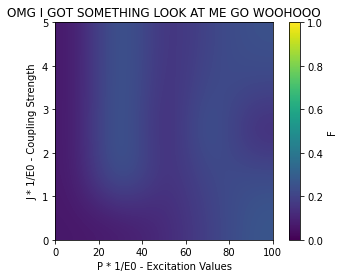


P =  [  0.  25.  50.  75. 100.] 
J = [0.   1.25 2.5  3.75 5.  ] 
E =  50 
(z1,z2) =
((0.3390927274276422-0.7606615080512533j),(0.40465297826424673+0.5017916040461161j))


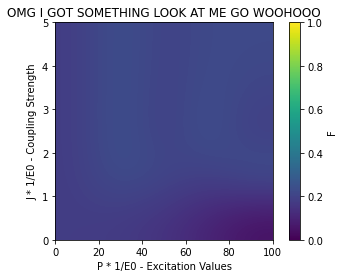


P =  [  0.  25.  50.  75. 100.] 
J = [0.   1.25 2.5  3.75 5.  ] 
E =  60 
(z1,z2) =
((-0.28599053747503567+0.7962661058926244j),(-0.802102595880167+0.7145382046778995j))


In [353]:
metadata=dict(title='movie',artist='me')
writer=PillowWriter(fps=15,metadata=metadata)

with writer.saving(fig, 'kek.gif',100):
    for val in E_array:
        f(E=val)
        writer.grab_frame()
        

# CASE 2: KEEPING P,J,E CONSTANT AND SAMPLING 2k STATES

In [250]:
#def f1(P=20,J=2,E0=1,E=3):
##################################################################
gnd_state = np.array([[1],[0]]) #the |0> state

phi_initial_g = np.array([[1],[0]]) #the |0> state for computational qubit
vac = np.array([[1],[0]]) #the |0> state for reservoir qubit
phi_initial_e = np.array([[0],[1]]) #the |1> state for computational qubit

exc_state = np.array([[0],[1]]) #the |1> state
##################################################################
Hcopy = H
E0 = 1
#div = 5
P = 20 
J = 2
E = 3#3*np.pi/2
hbar=1
dt = 0.001 * E0/hbar
nsteps = 3000 # think like total time your simulation run for
T = nsteps  * dt #total time
t = np.arange(0, T+dt, dt)
Ham=np.array(Hcopy.subs({"E_{11}":E,"P_{1}":P,
                "J_{11}":J})).astype('complex128') * 1/E0
U = expm(-1j* Ham * dt)


n = 2000
phi_initial={}
# z1array=np.zeros(n,dtype='complex128')
# z2array=np.zeros(n,dtype='complex128')
for i in range(n):
    x1 = np.random.rand(1)*np.power(-1,np.random.randint(1,3))
    y1 = np.random.rand(1)*np.power(-1,np.random.randint(1,3))
    z1 = complex(x1,y1)
    x2 = np.random.rand(1)*np.power(-1,np.random.randint(1,3))
    y2 = np.random.rand(1)*np.power(-1,np.random.randint(1,3))
    z2 = complex(x2,y2)
    if z1==0: 
        tmp =0j
        if z1==z2:
            tmp = z2
            while tmp==z2:
                x2 = np.random.rand(1)*np.power(-1,np.random.randint(1,3))
                y2 = np.random.rand(1)*np.power(-1,np.random.randint(1,3))
                z2 = complex(x2,y2)
    #z1array[i]=z1
    #z2array[i]=z2
    phi_initial[i] = z1*phi_initial_g + z2*phi_initial_e

#the |phi_initial> (x)  |vac>_QN state = |psi_initial>    
psi_initial = {}
for i in range(n):
    psi_initial[i] = 1/np.sqrt(np.abs(z1)**2+np.abs(z2)**2) * (
            MTP(phi_initial[i],vac) )

#defining my collection of complex coefficients
#of series of evolved states
a = np.zeros(n*len(t),dtype=np.complex128)
a_array_tmp = np.zeros(n*len(t),dtype=np.complex128)
b = np.zeros(n*len(t),dtype=np.complex128)
b_array_tmp = np.zeros(n*len(t),dtype=np.complex128)
c = np.zeros(n*len(t),dtype=np.complex128)
c_array_tmp = np.zeros(n*len(t),dtype=np.complex128)
d = np.zeros(n*len(t),dtype=np.complex128)
d_array_tmp = np.zeros(n*len(t),dtype=np.complex128)

psi_out = {}
k=0
for length in range(len(psi_initial)):
    for i in range(len(t)):
        a_array_tmp[k] = psi_initial[length][0][0] #accessing 0th posn of vector 0
        b_array_tmp[k] = psi_initial[length][1][0]
        c_array_tmp[k] = psi_initial[length][2][0]
        d_array_tmp[k] = psi_initial[length][3][0]#accessing 3th posn of vector 0
        psi_initial[length] = U @ psi_initial[length] # U[0] with E[0] value
        k+=1
    a = np.mean(a_array_tmp)
    b = np.mean(b_array_tmp)
    c = np.mean(c_array_tmp)
    d = np.mean(d_array_tmp)
    psi_out[length] = np.array([[a],[b],
                                  [c],[d]])
        
pho = {} 
for i in range(len(psi_out)):
    pho[i] = MTP(psi_out[i],psi_out[i].conjugate().T)

pho_c = {}
Id = np.eye(2) 
for i in range(len(pho)):
    pho_c[i] = MTP(Id, gnd_state.T)@pho[i]@MTP(Id, gnd_state) + ( 
    MTP(Id, exc_state.T)@pho[i]@MTP(Id, exc_state) )


X_gate = np.array([[0,1],[1,0]])
phi_ideal={}
for i in range(len(phi_initial)):
    phi_ideal[i] = X_gate @ phi_initial[i]

F = np.zeros(len(pho_c))
F_norm = np.zeros(len(pho_c))
Ftemp={}
k=0
for i in range(len(pho_c)):
    Ftemp[i] = (phi_ideal[i].conjugate().T @ pho_c[i] @ phi_ideal[i]).real
    F[i] = Ftemp[i][0][0]
norm = np.linalg.norm(F)
F_norm = F/norm

#     F_array = np.zeros((len(P_array),len(J_array)))
#     k=0
#     for i in range(len(P_array)):
#         for j in range(len(J_array)):
#             F_array[i][j] = F_norm[k]
#             k+=1
#     def forceAspect(ax,aspect=1):
#         im = ax.get_images()
#         extent =  im[0].get_extent()
#         ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)
#     fig, ax = plt.subplots()
#     X,Y = np.meshgrid(P_array,J_array)
#     #ax.set_aspect('auto')
#     #norm_F_array = (F_array - np.min(F_array)) / (np.max(F_array) - np.min(F_array))
#     pos=ax.imshow(F_array, cmap='viridis', interpolation='bicubic', extent=[P_array[0],P_array[-1],J_array[-1],J_array[0]], vmin=0,vmax=1)
#     ax.invert_yaxis()
#     forceAspect(ax,aspect=1)
#     ax.set_title('OMG I GOT SOMETHING LOOK AT ME GO WOOHOOO')
#     ax.set_xlabel('P * 1/E0 - Excitation Values')
#     ax.set_ylabel("J * 1/E0 - Coupling Strength")
#    | cbar = plt.colorbar(pos)
#     cbar.set_label(r'F')
#     plt.show()
#     print('\nP = ', P_array, '\nJ =',J_array,'\nE = ',E, f'\n(z1,z2) =\n({z1},{z2})')
#     return None #fig

In [159]:
len(F_norm)

In [204]:
np.histogram(F_norm, bins=100)

(array([118.39176978,  66.51693073,  50.20145715,  41.41620215,
         46.85469334,  40.99785667,  30.95756524,  25.10072858,
         22.17231024,  28.44749239,  22.59065572,  20.49892834,
         16.31547357,  23.00900119,  21.33561929,  19.24389191,
         16.73381905,  13.38705524,  14.22374619,  13.80540072,
         13.38705524,  12.13201881,  11.29532786,  13.38705524,
          7.94856405,   9.20360048,   8.785255  ,   6.27518214,
          7.53021857,   6.27518214,   8.785255  ,   5.43849119,
          6.27518214,   4.60180024,   2.92841833,   2.51007286,
          5.02014572,   3.34676381,   4.60180024,   2.09172738,
          2.51007286,   2.09172738,   2.51007286,   1.67338191,
          2.51007286,   2.51007286,   4.18345476,   1.25503643,
          1.25503643,   2.09172738,   1.25503643,   2.09172738,
          1.25503643,   0.41834548,   0.        ,   0.83669095,
          0.83669095,   0.41834548,   0.83669095,   0.41834548,
          0.41834548,   0.83669095,   0.

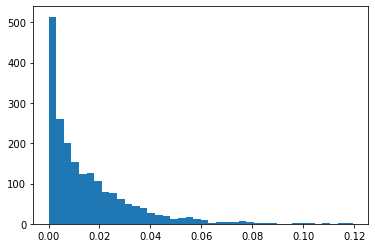

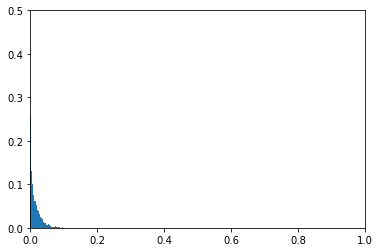

In [248]:
# y,u,i = plt.hist(F_norm,bins='auto',density=False,histtype='bar')
# plt.show()
# y=y/len(F_norm)
# y=np.append(y,0)
# mu=np.mean(y)
# sigma=np.std(y)
# plt.bar(u,y,width=(u[len(u)-1]-u[0])/(len(u)-1))
# #y1=(1/(sigma*np.sqrt(2*np.pi))*np.exp(-(u-mu)**2/(2*sigma**2)))*0.3
# #y2 = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
#      #np.exp(-0.5 * (1 / sigma * (u - mu))**2))
# #plt.plot(u,y2,'r--')
# plt.ylim([0,0.5])
# plt.xlim([0,1])
# plt.show()

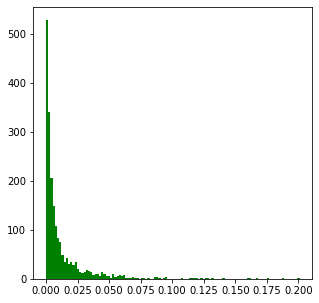

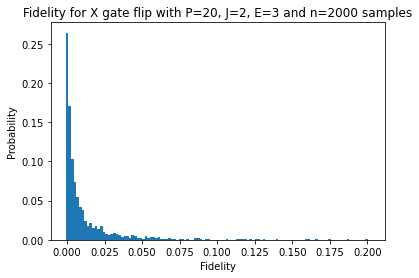

In [251]:
fig=plt.figure(figsize=(5,5))
r,bins,patch=plt.hist(F_norm,bins='auto',density=False,color='g',histtype='bar')
plt.show()
r=r/len(F_norm)
r=np.append(r,0)
plt.bar(bins,r,width=(bins[len(bins)-1]-bins[0])/(len(bins)-1))
#plt.xlim([0,1])
plt.ylabel('Probability')
plt.xlabel('Fidelity')
plt.title(f'Fidelity for X gate flip with P={P}, J={J}, E={E} and n={n} samples')
plt.show()
#np.histogram(F_norm)

In [121]:
a_array

(8.77374293130966e-05-6.913911541685944e-05j)

# I'm going through a phase, a relative phase

In [252]:
Hcopy = H
E0 = 1 #variance of uniform distrib of energies E0
P = 20 / E0
J = 2 / E0
E = 20 * E0
# for i in range(n):
#     E = float(-E0/2 +(np.random.rand(1)*E0)) #onsite V for reservoir qubits
#     E_array[i] =  E #check decimals => possible errors?
    # fix value of E
Hamil = np.array(Hcopy.subs({"E_{11}":E,"P_{1}":P,
        "J_{11}":J})).astype('complex128') * 1/E0
hbar = 1
dt = 0.001 * E0/hbar
nsteps = 3000 # think like total time your simulation run for
T = nsteps  * dt #total time
t = np.arange(0, T+dt, dt) #creates array from 0 to T +dt in steps of dt

U = expm(-1j* Hamil * dt)

n = 2000
phi_initial={}
for i in range(n):
    x1 = np.random.rand(1)*np.power(-1,np.random.randint(1,3))
    y1 = np.random.rand(1)*np.power(-1,np.random.randint(1,3))
    z1 = complex(x1,y1)
    k = 1
    test0 = 0*j
    while k > 0:
        x2 = np.random.rand(1)*np.power(-1,np.random.randint(1,3))
        y2 = np.random.rand(1)*np.power(-1,np.random.randint(1,3))
        z2 = complex(x2,y2)
        if z2 == test0:
            if z2==z1:
                continue
        else: 
            break

    phi_initial[i] = z1*phi_initial_g + z2*phi_initial_e

#the |phi_initial> (x)  |vac>_QN state = |psi_initial>    
psi_initial = {}
for i in range(n):
    psi_initial[i] = 1/np.sqrt(np.abs(z1)**2+np.abs(z2)**2) * (
                MTP(phi_initial[i],vac) )
a_array = np.zeros(n*len(t),dtype=np.complex128)
b_array = np.zeros(n*len(t),dtype=np.complex128)
c_array = np.zeros(n*len(t),dtype=np.complex128)
d_array = np.zeros(n*len(t),dtype=np.complex128)
a_complex_real = np.zeros(n*len(t))
a_complex_imag = np.zeros(n*len(t),dtype=np.complex128)
b_complex_real = np.zeros(n*len(t))
b_complex_imag = np.zeros(n*len(t),dtype=np.complex128)
c_complex_real = np.zeros(n*len(t))
c_complex_imag = np.zeros(n*len(t),dtype=np.complex128)
d_complex_real = np.zeros(n*len(t))
d_complex_imag = np.zeros(n*len(t),dtype=np.complex128)
a_array_avg = np.zeros(n)
k=0
for length in range(len(psi_initial)):
    for i in range(len(t)):
        a_array[k] = np.abs(psi_initial[length][0][0])**2 #accessing 0th posn of vector 0
        b_array[k] = np.abs(psi_initial[length][1][0])**2
        c_array[k] = np.abs(psi_initial[length][2][0])**2
        d_array[k] = np.abs(psi_initial[length][3][0])**2 #accessing 3th posn of vector 0
        a_complex_real[k], a_complex_imag[k] =  psi_initial[length][0][0].real, psi_initial[length][0][0].imag
        b_complex_real[k], b_complex_imag[k] =  psi_initial[length][1][0].real, psi_initial[length][1][0].imag
        c_complex_real[k], c_complex_imag[k] =  psi_initial[length][2][0].real, psi_initial[length][2][0].imag
        d_complex_real[k], d_complex_imag[k] =  psi_initial[length][3][0].real, psi_initial[length][3][0].imag
        
        psi_initial[length] = U @ psi_initial[length] # U[0] with E[0] value
        k+=1

        

In [380]:
arr = np.array([2, 7, 5, 8, 9,4])

arr1 = np.mean(arr)
print(arr1)

5.833333333333333


In [377]:
len(a_array)

In [378]:
len(t)

In [ ]:
Hcopy = H
E0 = 1 #variance of uniform distrib of energies E0
P = 20 / E0
J = 2 / E0
E = 20 * E0
# for i in range(n):
#     E = float(-E0/2 +(np.random.rand(1)*E0)) #onsite V for reservoir qubits
#     E_array[i] =  E #check decimals => possible errors?
    # fix value of E
Hamil = np.array(Hcopy.subs({"E_{11}":E,"P_{1}":P,
        "J_{11}":J})).astype('complex128') * 1/E0
hbar = 1
dt = 0.001 * E0/hbar
nsteps = 3000 # think like total time your simulation run for
T = nsteps  * dt #total time
t = np.arange(0, T+dt, dt) #creates array from 0 to T +dt in steps of dt

U = expm(-1j* Hamil * dt)

n = 2000
phi_initial={}
for i in range(n):
    x1 = np.random.rand(1)*np.power(-1,np.random.randint(1,3))
    y1 = np.random.rand(1)*np.power(-1,np.random.randint(1,3))
    z1 = complex(x1,y1)
    k = 1
    test0 = 0*j
    while k > 0:
        x2 = np.random.rand(1)*np.power(-1,np.random.randint(1,3))
        y2 = np.random.rand(1)*np.power(-1,np.random.randint(1,3))
        z2 = complex(x2,y2)
        if z2 == test0:
            if z2==z1:
                continue
        else: 
            break

    phi_initial[i] = z1*phi_initial_g + z2*phi_initial_e

#the |phi_initial> (x)  |vac>_QN state = |psi_initial>    
psi_initial = {}
for i in range(n):
    psi_initial[i] = 1/np.sqrt(np.abs(z1)**2+np.abs(z2)**2) * (
                MTP(phi_initial[i],vac) )

#################################################

# defining complex coefficients and real/imag variables for evolved state
a_array = np.zeros(n,dtype=np.complex128)
b_array = np.zeros(n,dtype=np.complex128)
c_array = np.zeros(n,dtype=np.complex128)
d_array = np.zeros(n,dtype=np.complex128)
a_complex_real = np.zeros(n)
a_complex_imag = np.zeros(n,dtype=np.complex128)
b_complex_real = np.zeros(n)
b_complex_imag = np.zeros(n,dtype=np.complex128)
c_complex_real = np.zeros(n)
c_complex_imag = np.zeros(n,dtype=np.complex128)
d_complex_real = np.zeros(n)
d_complex_imag = np.zeros(n,dtype=np.complex128)
k=0
for length in range(len(psi_initial)):
    for i in range(len(t)):
        a_array[k] = np.abs(psi_initial[length][0][0])**2 #accessing 0th posn of vector 0
        b_array[k] = np.abs(psi_initial[length][1][0])**2
        c_array[k] = np.abs(psi_initial[length][2][0])**2
        d_array[k] = np.abs(psi_initial[length][3][0])**2 #accessing 3th posn of vector 0
        psi_initial[length] = U @ psi_initial[length] # U[0] with E[0] value
        a_complex_real[k], a_complex_imag[k] =  psi_initial[length][0][0].real, psi_initial[length][0][0].imag
        b_complex_real[k], b_complex_imag[k] =  psi_initial[length][1][0].real, psi_initial[length][1][0].imag
        c_complex_real[k], c_complex_imag[k] =  psi_initial[length][2][0].real, psi_initial[length][2][0].imag
        d_complex_real[k], d_complex_imag[k] =  psi_initial[length][3][0].real, psi_initial[length][3][0].imag
        k+=1

        
#so my a_array and such going to contain values for both initial states
#0 and 1

#a_array[0:nsteps+1], a_array[nsteps+1:] = (first vector, second vector) 


###########################################################################
#div, len(a_array), 
#a_array[0:nsteps+1], a_array[nsteps+1:] = (first vector, second vector) 
###########################################################################

# plt.plot(t,a_array[0:nsteps+1],'b',label='|00>')
# plt.plot(t,b_array[0:nsteps+1],'g',label='|01>')
# plt.plot(t,c_array[0:nsteps+1],'r',label='|10>')
# plt.plot(t,d_array[0:nsteps+1],'k',label='|11>')
# plt.legend()
# plt.show()


fig, axs = plt.subplots(2,2)
axs[0,0].plot(t,a_array[0:nsteps+1],'b',label='|00>')
axs[0,0].legend()
#axs[0,0].set_title('prob distribution of state |00>')
axs[0,1].plot(t, b_array[0:nsteps+1],'g',label='|01>')
axs[0,1].legend()
axs[1,0].plot(t, c_array[0:nsteps+1],'r',label='|10>')
axs[1,0].legend()
axs[1,1].plot(t, d_array[0:nsteps+1],'k',label='|11>')
axs[1,1].legend()

for ax in axs.flat:
    ax.set(xlabel='time', ylabel='complex # squared')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
print('\nP = ', P, '\tJ = ', J, '\tE = ', E_array[0],'\nInitial State = ',
     psi_initial[0])
# ##########################################################################################

# E = -0.0829806823365895
# E =  -0.23904176709730762 
# E =  0.4528425029534273 
# E =  -0.40402154911946553 
# E =  0.45078074750701513 